# Plot Coherence Over Time

Rather than getting the coherence between wires on average for a whole recording, it can be helpful to view how the coherence changes over time.  This notebook will describe how we do this.

## Extracting data from NeuroExplorer

This process is much like what is used for plotting coherence for a single time bin; our NeuroExplorer template `coherence_4_tetrodes.ntp` is still used, but the script `coherence_4_tetrodes_overtime.py` applies it many times over a given recording for smaller chunks of data.  The output is a "superfolder" with subfolders corresponding to each time bin, all filled with `.csv` files of the coherence data.

The example data used in this notebook was generated using the following steps:
1. Open the recording data file (from Plexon) in NeuroExplorer.  **All the LFPs are labeled using "FP##"** (this is how the code finds them).
2. Open the script `coherence_4_tetrodes_overtime.py` in NeuroExplorer's IDE.
3. Within the "parameters" section of the script, make sure the `template` variable points to the template `coherence_4_tetrodes`.  Double check that all other settings are appropriate.  The `bin_size` argument is what determines the output frequency.
4.  Run the script!

The output of this process is the folder `coherence overtime plot data` within the `exampledata` folder.  The example was generated from a recording of an animal with tetrodes in the ventral tegmental area (VTA), basolateral amygdala (BLA), nucleus accumbens (NAc), and prefrontal cortex (PFC).  As this process can generate a lot of data, only 10 minutes were used with a 30 second bin width.  The recording was a baseline recording with no other manipulations. 

Note that the script will try to write a `movement.csv` file using a variable "Motion" which is based on mouse tracking data.  This may need to be removed or modified depending on if you have tracking data & how it is loaded into NeuroExplorer.

## Plotting

We import `coherence.py` below to make it's functions & classes available.  Rather than working with a directory, we will load the data into an object in Python using `co.Coherence_Matrix_Overtime()`.  There are then plotting functions within `coherence.py` that work on instances of `co.Coherence_Matrix_Overtime`.

At the time of loading the data, we can specify which frequencies to include, which wires to plot, and what to call each wire  (see `help(co.Coherence_Matrix_Overtime)`).  Here, I will load data for the beta band, labeling wires according to their brain region using `co.Region` objects.  I will also pass the argument `color` for each `co.Region` to give them a unique color when plotting later.

In [1]:
import coherence as co

path = r"exampledata\coherence overtime plot data"

vta = co.Region('VTA', range(1,4), color='red')
bla = co.Region('BLA', range(5,8), color='blue')
nac = co.Region('NAc', range(9,12), color='green')
pfc = co.Region('PFC', range(13,16), color='orange')

mouse1 = co.Coherence_Matrix_Overtime(path, #path to the data
                                    band = 'beta', #band to analyze
                                    vta=vta, #Region arguments passed to label wires
                                    bla=bla,
                                    nac=nac,
                                    pfc=pfc) 

----------

Trying to compute coherence data for "exampledata\coherence overtime plot data".


Starting loop:

exampledata\coherence overtime plot data\0_100-130 processed
exampledata\coherence overtime plot data\1_130-160 processed
exampledata\coherence overtime plot data\2_160-190 processed
exampledata\coherence overtime plot data\3_190-220 processed
exampledata\coherence overtime plot data\4_220-250 processed
exampledata\coherence overtime plot data\5_250-280 processed
exampledata\coherence overtime plot data\6_280-310 processed
exampledata\coherence overtime plot data\7_310-340 processed
exampledata\coherence overtime plot data\8_340-370 processed
exampledata\coherence overtime plot data\9_370-400 processed
exampledata\coherence overtime plot data\10_400-430 processed
exampledata\coherence overtime plot data\11_430-460 processed
exampledata\coherence overtime plot data\12_460-490 processed
exampledata\coherence overtime plot data\13_490-520 processed
exampledata\coherence overtime 

The loaded data are stored in the `data` attribute of `mouse1` as a list of DataFrames.

In [2]:
import pandas as pd

mouse1.data[0].head(16)

,VTA 1,VTA 2,VTA 3,VTA 4,BLA 1,BLA 2,BLA 3,BLA 4,NAc 1,NAc 2,NAc 3,NAc 4,PFC 1,PFC 2,PFC 3,PFC 4
VTA 1,1.000000,0.258501,0.142586,0.082332,0.079183,0.084455,0.091649,0.123593,0.080136,0.075053,0.073860,0.082961,0.092711,0.082084,0.092549,0.083115
VTA 2,0.258501,1.000000,0.152958,0.403065,0.069937,0.101562,0.120005,0.175438,0.070500,0.089808,0.089982,0.070298,0.106763,0.092559,0.115455,0.111483
VTA 3,0.142586,0.152958,1.000000,0.152358,0.069505,0.074358,0.068805,0.077776,0.083211,0.077059,0.076427,0.096725,0.071166,0.090978,0.088507,0.085723
VTA 4,0.082332,0.403065,0.152358,1.000000,0.065780,0.055943,0.085234,0.083115,0.087918,0.111414,0.092165,0.075517,0.069431,0.090315,0.102645,0.101254
BLA 1,0.079183,0.069937,0.069505,0.065780,1.000000,0.148837,0.117082,0.423749,0.080066,0.082279,0.085136,0.079876,0.078028,0.079977,0.078115,0.083572
BLA 2,0.084455,0.101562,0.074358,0.055943,0.148837,1.000000,0.133785,0.188397,0.083262,0.087282,0.084464,0.071444,0.100196,0.083485,0.098252,0.099313
BLA 3,0.091649,0.120005,0.068805,0.085234,0.117082,0.133785,1.000000,0.103128,0.079387,0.074126,0.078211,0.082172,0.103182,0.072041,0.086271,0.083136
BLA 4,0.123593,0.175438,0.077776,0.083115,0.423749,0.188397,0.103128,1.000000,0.079872,0.091117,0.070936,0.079987,0.153076,0.088981,0.155018,0.151804
NAc 1,0.080136,0.070500,0.083211,0.087918,0.080066,0.083262,0.079387,0.079872,1.000000,0.794035,0.765647,0.785990,0.118796,0.254256,0.262823,0.296940
NAc 2,0.075053,0.089808,0.077059,0.111414,0.082279,0.087282,0.074126,0.091117,0.794035,1.000000,0.609368,0.450054,0.116182,0.303533,0.280606,0.326037


### Plot the coherence matrix/circle as a GIF
`co.animated_coherence_plot()` can be used to merge each frame of data into GIF.

To save, you can call the method `save`, like so:
```
graph = co.animated_coherence_plot(mouse1, graph='matrix')
graph.save('animated coherence plot.gif', dpi = 300)
```

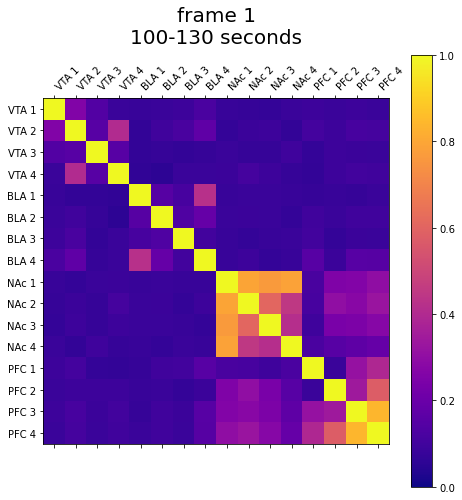

In [3]:
co.animated_coherence_plot(mouse1, graph='matrix')

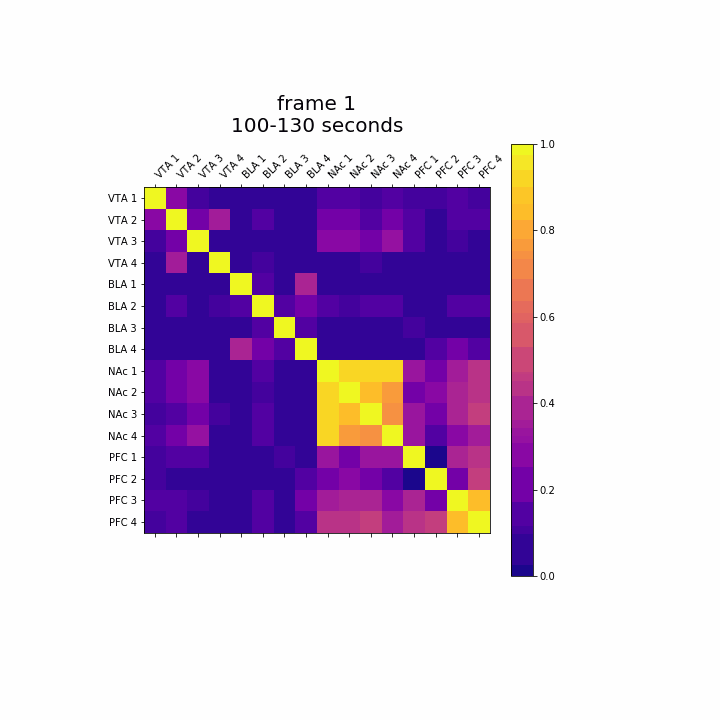

In [4]:
#using Ipython.display to render the gif in the notebook
from IPython.display import Image

with open(r'img/animated coherence plot.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

### Plot the coherence data overtime as a line plot

`co.coherence_line_plot()` can be used to plot each data point on a line.  With no additional arguments, the average of the entire matrix is plotted.

No handles with labels found to put in legend.


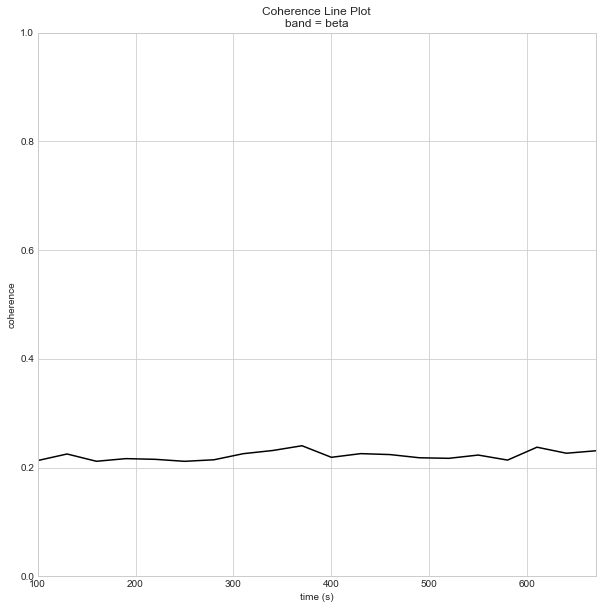

In [5]:
plot = co.coherence_line_plot(mouse1)

### Plot coherence within individual regions

Within `co.coherence_line_plot()`, passing `co.Region` keyword arguments will plot individual regions as separate lines.  The code below only plots coherence _within regions_.  The average of the coherence between all specified wires at the given time point is plotted.

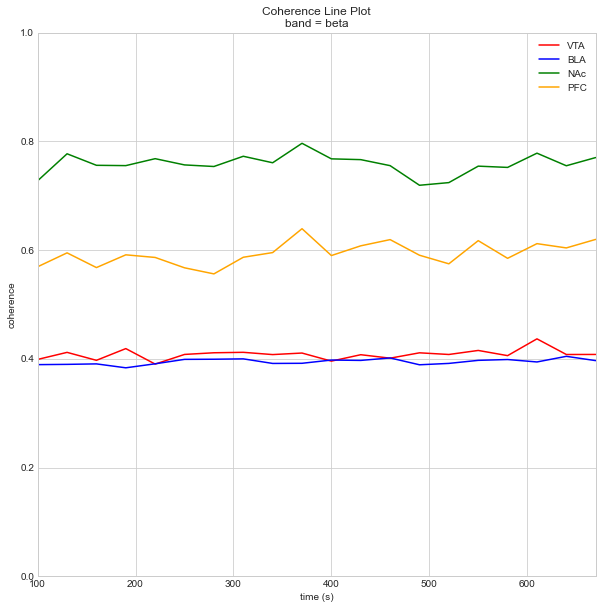

In [6]:
plot = co.coherence_line_plot(mouse1,
                              vta = vta,
                              bla = bla,
                              nac = nac,
                              pfc = pfc)

As `co.coherence_line_plot()` actually returns the figure, additional matplotlib arguments can be used to modify the plot (unlike when using `co.coherence_plotter()`).

(300.0, 400.0)

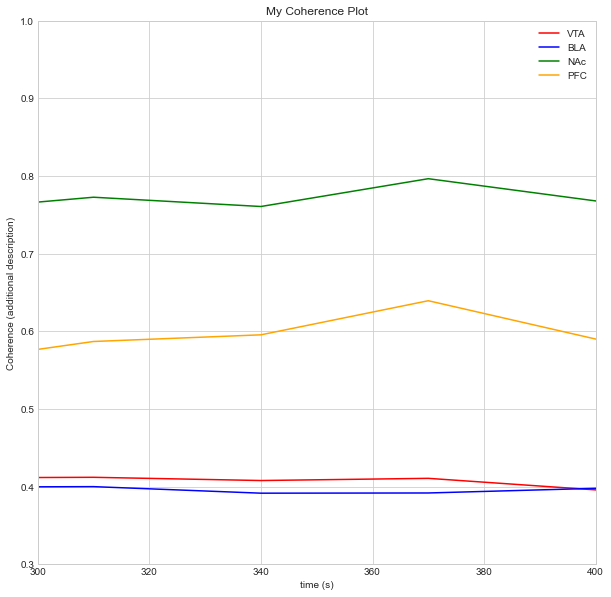

In [7]:
import matplotlib.pyplot as plt
plot = co.coherence_line_plot(mouse1,
                              vta = vta,
                              bla = bla,
                              nac = nac,
                              pfc = pfc)

plt.title('My Coherence Plot')
plt.ylabel('Coherence (additional description)')
plt.ylim(.3,1)
plt.xlim(300,400)

### Plot coherence between regions
Passing different values to a `co.Region` object's `axis1` and `axis2` arguments will allow plotting of matrix values which correspond to coherence between wires of different regions.  The average of the coherence between all specified wires at the given time point is plotted.

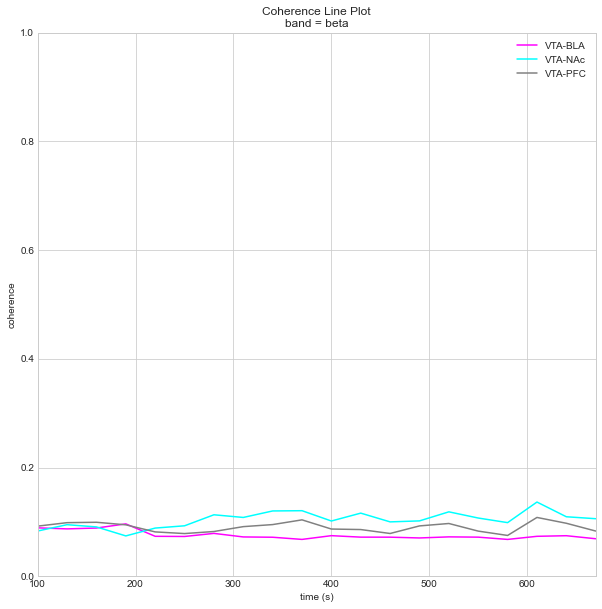

In [8]:
vtabla = co.Region('VTA-BLA', axis1=range(1,4), axis2=range(5,8), color='magenta')
vtanac = co.Region('VTA-NAc', axis1=range(1,4), axis2=range(9,12), color='cyan')
vtapfc = co.Region('VTA-PFC', axis1=range(1,4), axis2=range(13,16), color='grey')

plot = co.coherence_line_plot(mouse1, x=vtabla, y=vtanac, z=vtapfc)

### Include Movement
If `co.Coherence_Matrix_Overtime()` was able to find movement data, a movement subplot can be added.

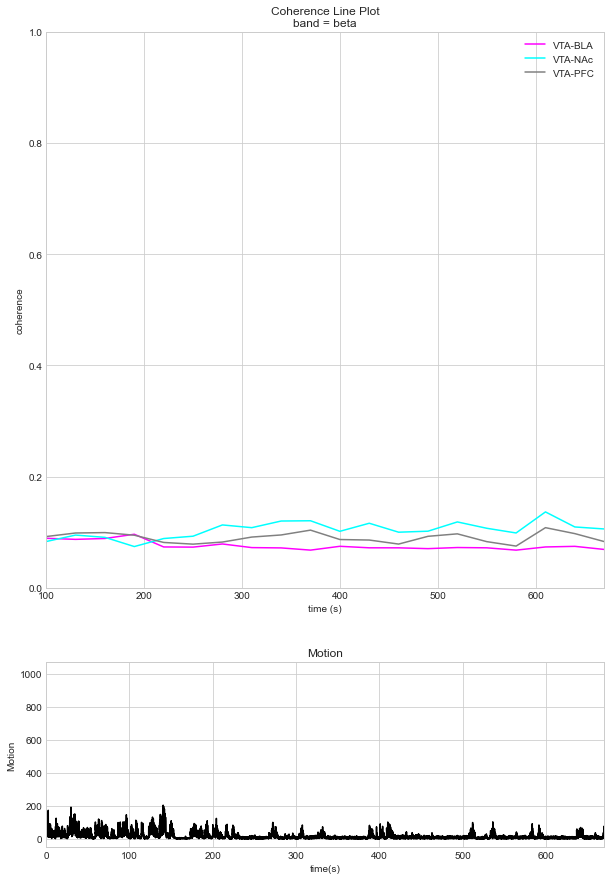

In [9]:
plot = co.coherence_line_plot(mouse1, include_mvmt=True,x=vtabla, y=vtanac, z=vtapfc)

### Saving figures
Line plots can be saved by calling `plt.savefig()`.
```
plt.savefig('my graph name.png', dpi=300)

#or if the plot has been assigned to a variable

thisgraph = co.coherence_line_plot(mouse1)
thisgraph.savefig('my graph name.png', dpi=300)
```

### Saving data in a .csv

`co.coherence_line_df()` can also be used to return the plotted data as a `pandas DataFrame`, which can then be saved to a `.csv` file using the `to_csv()` method.

In [10]:
df = co.coherence_line_df(mouse1,x=vtabla, y=vtanac, z=vtapfc)
df

#to save, call:
#df.to_csv('spreadsheet name.csv')

,Time (s),VTA-BLA (beta),VTA-NAc (beta),VTA-PFC (beta)
0,100,0.089146,0.083315,0.092296
1,130,0.087222,0.094940,0.098666
2,160,0.088796,0.090852,0.099396
3,190,0.096425,0.074293,0.094697
4,220,0.073579,0.088719,0.081678
5,250,0.073267,0.092904,0.078610
6,280,0.078932,0.113164,0.082397
7,310,0.072406,0.108263,0.091364
8,340,0.071850,0.120210,0.095140
9,370,0.067872,0.120689,0.103818


Movement data is not included here because of the different sampling frequencies, but can be accessed as a Dataframe and saved separately through the `movement` attribute of `co.Coherence_Matrix_Overtime`.

In [11]:
df2 = mouse1.movement
df2

,time,motion
0,0.033400,52.0
1,0.066725,27.0
2,0.100050,28.0
3,0.133400,43.0
4,0.166725,42.0
5,0.200050,31.0
6,0.233400,30.0
7,0.266725,20.0
8,0.300050,23.0
9,0.333400,27.0


# Updates/Bugs

### 2.26.20

Changes have been made to the `coherence_4_tetrodes_overtime_withfilter.py` script to allow for non-continuous intervals.  In this way, intervals can be drawn to omit noise/artefacts in the local field potential.  A new `bin_key.csv` file is generated when running the script, which keeps track of which bins have complete data.  Finally, `co.Coherence_Matrix_Overtime.fill_nan()` can be used to replace the incomplete bins with null values `np.nan` for plotting.  The code below uses example data created with non-continuous intervals.

----------

Trying to compute coherence data for "exampledata\broken interval data\test interval".


Starting loop:

exampledata\broken interval data\test interval\0_18.432-48.432 processed
exampledata\broken interval data\test interval\1_48.432-78.432 processed
exampledata\broken interval data\test interval\2_78.432-108.432 processed
exampledata\broken interval data\test interval\3_108.432-138.432 processed
exampledata\broken interval data\test interval\4_138.432-168.432 processed
exampledata\broken interval data\test interval\5_168.432-198.432 processed
exampledata\broken interval data\test interval\6_198.432-228.432 processed
exampledata\broken interval data\test interval\7_228.432-258.432 processed
exampledata\broken interval data\test interval\8_258.432-288.432 processed
exampledata\broken interval data\test interval\9_288.432-318.432 processed
exampledata\broken interval data\test interval\10_318.432-348.432 processed
exampledata\broken interval data\test interval\11_348.432-378.

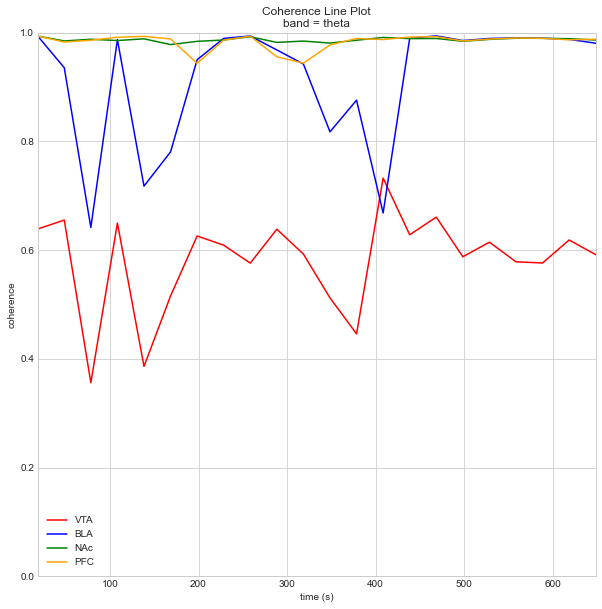

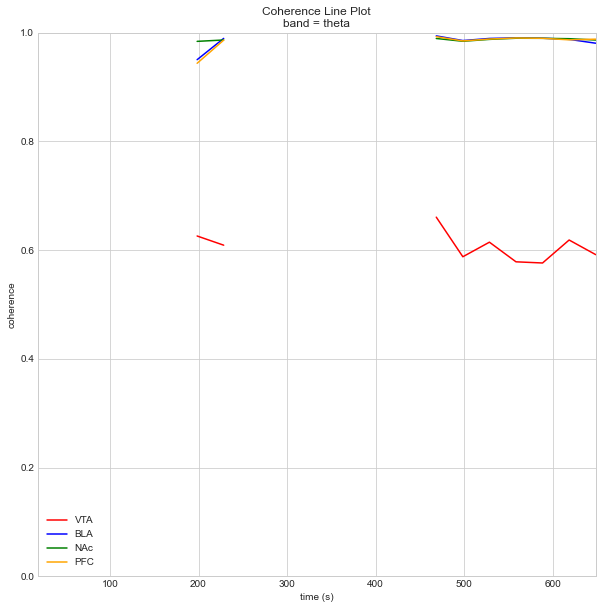

In [12]:
#load the data as usual
broken_interval_data = r"exampledata\broken interval data\test interval"

mouse2 = co.Coherence_Matrix_Overtime(broken_interval_data,
                                     band='theta')

#using the region arguments constructed above
plot = co.coherence_line_plot(mouse2,
                              vta=vta,
                              bla=bla,
                              nac=nac,
                              pfc=pfc)

#using .fill_nan() to omit points where bins were incomplete
#(due to the NEx interval)
mouse2.fill_nan()

#replotting
plot2 = co.coherence_line_plot(mouse2,
                              vta=vta,
                              bla=bla,
                              nac=nac,
                              pfc=pfc)

## 3.2.2020

Added arguments to `co.coherence_line_plot` and `co.coherence_line_df` to try and automatically find regions to plot (accomplished by the helper function `co.find_regions`):
- `find_region_names`(list): list of string names of regions. These names should denote the regions where arrays are implanted.  The program assumes that the regions all have the same number of wires.
- `find_between_regions`(bool): find and plot wires corresponding to coherence between arrays
- `find_within_regions` (bool): find and plot wires corresponding to coherence with arrays
- `find_region_printout` (bool): print the constructed `Region()` classes, to verify that the right connections are plotted

This function was only meant for time saving; it should achieve the same result as just passing `Region()` objects as kwargs (see above).  A printed warning will be raised if the process fails.

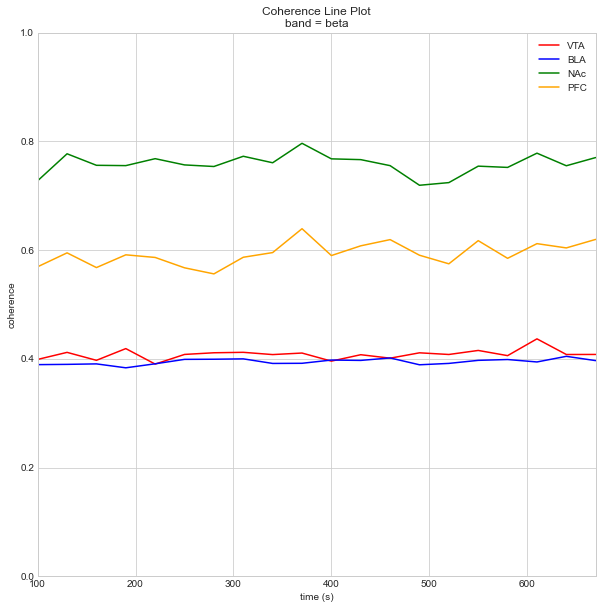

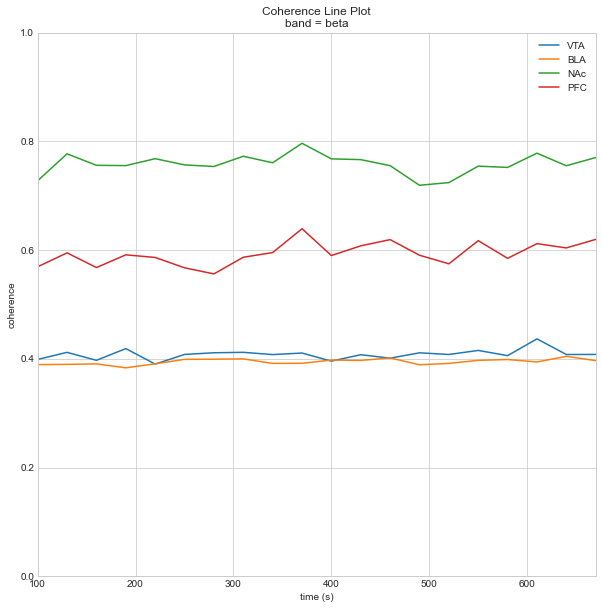

In [13]:
#original way:
vta = co.Region('VTA', range(1,4), color='red')
bla = co.Region('BLA', range(5,8), color='blue')
nac = co.Region('NAc', range(9,12), color='green')
pfc = co.Region('PFC', range(13,16), color='orange')

plot1 = co.coherence_line_plot(mouse1,vta=vta,bla=bla,nac=nac,pfc=pfc)

#new way
plot2 = co.coherence_line_plot(mouse1,find_region_names=['VTA','BLA','NAc','PFC'], find_within_regions=True)

Region(name=VTA-BLA, axis1=[0, 1, 2, 3], axis2=[4, 5, 6, 7], color=#1f77b4)
Region(name=VTA-NAc, axis1=[0, 1, 2, 3], axis2=[8, 9, 10, 11], color=#ff7f0e)
Region(name=VTA-PFC, axis1=[0, 1, 2, 3], axis2=[12, 13, 14, 15], color=#2ca02c)
Region(name=BLA-NAc, axis1=[4, 5, 6, 7], axis2=[8, 9, 10, 11], color=#d62728)
Region(name=BLA-PFC, axis1=[4, 5, 6, 7], axis2=[12, 13, 14, 15], color=#9467bd)
Region(name=NAc-PFC, axis1=[8, 9, 10, 11], axis2=[12, 13, 14, 15], color=#8c564b)


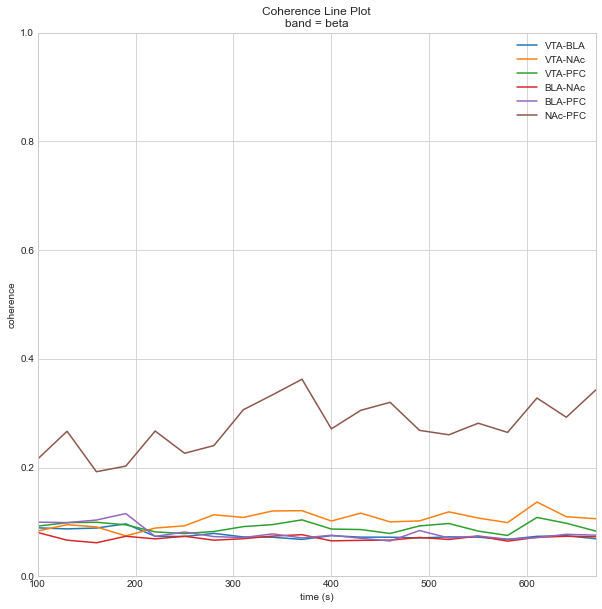

In [14]:
#make sure all regions look correct with 'find_regions_printout'
plot3 = co.coherence_line_plot(mouse1,find_region_names=['VTA','BLA','NAc','PFC'], 
                               find_between_regions=True,
                               find_region_printout=True)